# Environment Field

## Importing the dataset from the web page using API

In [56]:
import requests

url = "https://datasource.kapsarc.org/api/explore/v2.1/catalog/datasets/environment-database-2011/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true&apikey=322d3b8b19bd92c09abe2634f59fd92c1b5dbb3125232658fd1162f6"
response = requests.get(url)

if response.status_code == 200:
    with open("environment_database_2011.csv", "wb") as file:
        file.write(response.content)
    print("Download completed successfully.")
else:
    print(f"Failed to download the dataset. Status code: {response.status_code}")


Download completed successfully.


In [57]:
# importing the required libraries and reading the data
import pandas as pd

data = pd.read_csv("environment_database_2011.csv", sep=';')

In [58]:
# Slicing the data to get the data of required countries

countries = ['Afghanistan', 'Armenia', 'Australia', 'Bangladesh', 'Barbados',
             'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Cyprus',
             'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
             'Germany', 'Greenland']

data = data[data['location_name'].isin(countries)]

In [59]:
# displaying the data
data.head(10)

,date,location_name,category,variable_name,value,variable_unit
18,2009.0,Germany,Air and Climate,GHG from Waste,16.320830,mio. tonnes of CO2 equivalent
32,2007.0,Brazil,Energy and Minerals,"Energy Use Intensity per $1,000 (PPP) GDP",97.000000,kg. oil equivalent
33,1994.0,Germany,NaN,Land under Permanent Meadows and Pastures,52710.000000,km2
34,2005.0,Colombia,Inland Water Resources,Total population supplied by water supply indu...,91.169998,%
41,1997.0,Armenia,Inland Water Resources,Precipitation,18595.000000,mio m3
46,2017.0,Bulgaria,Inland Water Resources,Actual evapotranspiration,70207.000000,mio m3
69,2019.0,France,Inland Water Resources,Actual evapotranspiration,299236.970000,mio m3
73,NaN,Bulgaria,NaN,NaN,NaN,NaN
95,2018.0,Estonia,Inland Water Resources,Fresh groundwater abstracted,213.570000,mio m3
103,2019.0,Armenia,Inland Water Resources,Fresh groundwater abstracted,1294.300049,mio m3


In [60]:
# sorting the data by year
data = data.sort_values(by = "date",ascending=False)

In [61]:
# using simple imputer from scikit-learn to handle the missing values

from sklearn.impute import SimpleImputer

categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = data.select_dtypes(include=["number"]).columns.tolist()

# Replacing the null values in numerical columns with mean
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_numerical.fit_transform(data[numerical_cols])

# Replacing the null values in categorical columns with most-frequent item in the feature
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

# Data Visualization

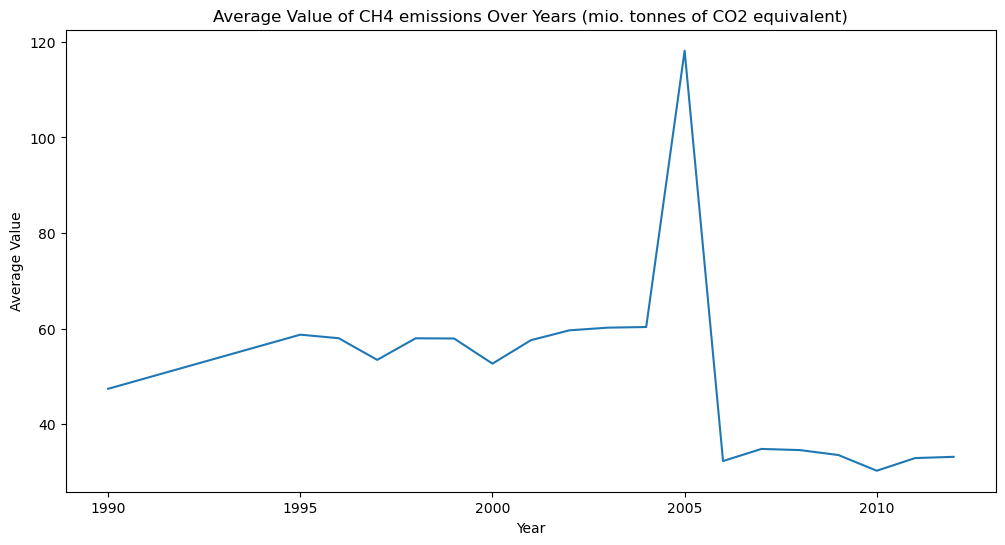

In [62]:
import matplotlib.pyplot as plt

data_CH4 = data[data["variable_name"]=="CH4 emissions"]

plt.figure(figsize=(12, 6))
data_CH4.groupby('date')['value'].mean().plot()
plt.title('Average Value of CH4 emissions Over Years (mio. tonnes of CO2 equivalent)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.savefig("CH4 Emissions.png",dpi=72)
plt.show()

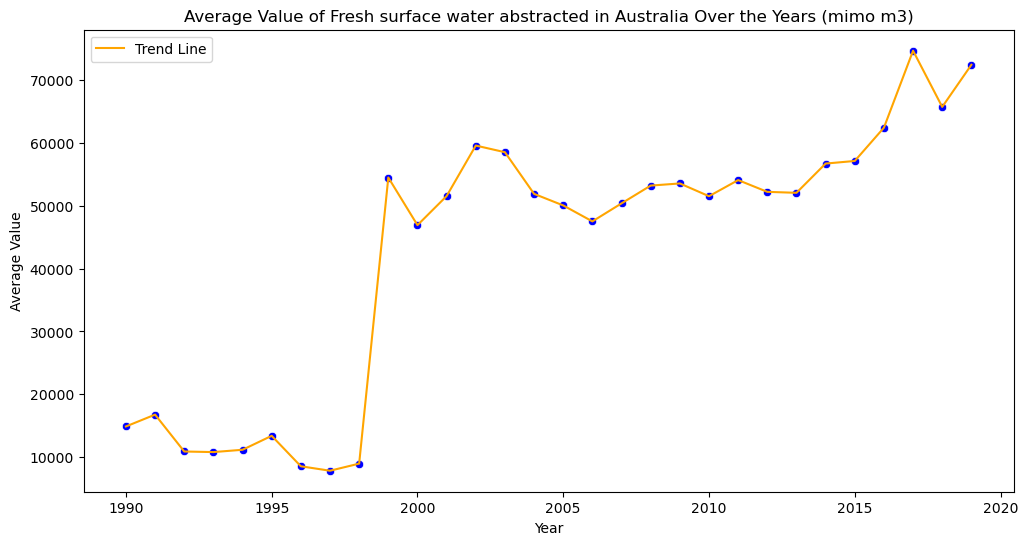

In [63]:
import seaborn as sns

data_aus = data[data["location_name"]=="Australia"]
data_freshwater = data[data["variable_name"]=="Fresh surface water abstracted"]
plt.figure(figsize=(12, 6))
data_freshwater =data_freshwater.groupby('date')['value'].mean().reset_index()
sns.scatterplot(data= data_freshwater,x="date",y="value",color='blue')
sns.lineplot(data=data_freshwater, x='date', y='value', color='orange', label='Trend Line')
plt.title('Average Value of Fresh surface water abstracted in Australia Over the Years (mimo m3)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.savefig(" Fresh surface water abstracted in Australia.png",dpi=72)
plt.show()

In [64]:
# Dropping the units column 
data = data.drop(data.columns[-1],axis=1)

In [65]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data['location_name'] = Le.fit_transform(data['location_name'])
data['category'] = Le.fit_transform(data['category'])
data['variable_name'] = Le.fit_transform(data['variable_name'])


In [66]:
# Applying the standardization to the numerical features such that all the features will be on same scale which is required for the model to perform analysis effectively
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

data[['value']] = standardscaler.fit_transform(data[['value']])
data[['date']] = standardscaler.fit_transform(data[['date']])


In [67]:
data= data.rename(columns = {"date":"Year"})

In [68]:
# Identifying the outliers using IQR and removing them

Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[(data['value'] >= (Q1 - 1.5 * IQR)) & (data['value'] <= (Q3 + 1.5 * IQR))]


In [72]:
data= data.rename(columns={"variable_name":"Inidcators","location_name":"Country","category":"Categories","value":"Value"})

In [73]:
# Visualizing the data after preprocessing
data

,Year,Country,Categories,Inidcators,Value
141647,2.013949,14,3,93,-0.141347
84513,2.013949,1,3,40,-0.140679
141443,2.013949,12,3,19,-0.141275
141458,2.013949,14,3,20,-0.140842
141460,2.013949,1,3,21,-0.141357
...,...,...,...,...,...
122418,-3.210874,6,1,11,-0.141390
2372,-3.210874,5,1,11,-0.141392
7341,-3.210874,1,1,11,-0.141392
129530,-3.210874,14,1,11,-0.141392
